### NIBBS FRAUD DETECTION

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('nibss_fraud_dataset.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_46252\3735779780.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nibss_fraud_dataset.csv')


In [14]:
data.head(10)

,transaction_id,customer_id,timestamp,amount,channel,merchant_category,bank,location,age_group,hour,...,hour_cos,day_sin,day_cos,month_sin,month_cos,amount_log,amount_rounded,velocity_score,merchant_risk_score,composite_risk
0,TXN_F08A86FFD87C,CUST_0002AED1,2023-01-14 04:31:09,32266.83,Mobile,Grocery,Sterling,Other,30-39,4,...,0.500000,-0.974928,-0.222521,0.500000,0.866025,10.381826,0,0.189369,0.215000,0.070560
1,TXN_C2D08134EC83,CUST_0002AED1,2023-01-17 11:20:13,72530.49,Web,Entertainment,UBA,Other,30-39,11,...,-0.965926,0.781831,0.623490,0.500000,0.866025,11.191776,0,0.425671,0.877424,0.276849
2,TXN_B9499111901D,CUST_0002AED1,2023-01-22 02:17:46,168152.87,Mobile,Transport,Wema,Other,30-39,2,...,0.866025,-0.781831,0.623490,0.500000,0.866025,12.032635,0,0.986866,0.440230,0.163649
3,TXN_48DB1D526A3B,CUST_0002AED1,2023-01-24 08:18:23,16439.93,Mobile,Entertainment,FCMB,Other,30-39,8,...,-0.500000,0.781831,0.623490,0.500000,0.866025,9.707529,0,0.096484,0.877424,0.266315
4,TXN_56DB1E28B758,CUST_0002AED1,2023-02-01 15:39:53,9922.68,POS,Education,FirstBank,Other,30-39,15,...,-0.707107,0.974928,-0.222521,0.866025,0.500000,9.202679,0,0.058235,0.231291,0.071251
5,TXN_8CB46D78CEED,CUST_0002AED1,2023-02-08 16:27:19,80685.56,Web,Restaurant,GTBank,Other,30-39,16,...,-0.500000,0.974928,-0.222521,0.866025,0.500000,11.298327,0,0.473532,0.608493,0.197701
6,TXN_5F6224E4DA4E,CUST_0002AED1,2023-02-15 13:05:34,29276.78,Web,Electronics,Wema,Other,30-39,13,...,-0.965926,0.974928,-0.222521,0.866025,0.500000,10.284584,0,0.171821,0.369588,0.116375
7,TXN_8375B147ADE5,CUST_0002AED1,2023-02-15 16:51:09,135669.83,Mobile,Airtime,Fidelity,Other,30-39,16,...,-0.500000,0.974928,-0.222521,0.866025,0.500000,11.817987,0,1.936097,0.490395,0.174877
8,TXN_EC83B575948F,CUST_0002AED1,2023-02-16 10:52:22,24629.69,Mobile,Transport,Fidelity,Other,30-39,10,...,-0.866025,0.433884,-0.900969,0.866025,0.500000,10.111749,0,3.337790,0.440230,0.143081
9,TXN_587A7A626F59,CUST_0002AED1,2023-02-20 19:48:06,211626.20,IB,Education,Sterling,Other,30-39,19,...,0.258819,0.000000,1.000000,0.866025,0.500000,12.262582,0,1.242004,0.231291,0.109131


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 38 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1000000 non-null  object 
 1   customer_id           1000000 non-null  object 
 2   timestamp             1000000 non-null  object 
 3   amount                1000000 non-null  float64
 4   channel               1000000 non-null  object 
 5   merchant_category     1000000 non-null  object 
 6   bank                  1000000 non-null  object 
 7   location              1000000 non-null  object 
 8   age_group             1000000 non-null  object 
 9   hour                  1000000 non-null  int64  
 10  day_of_week           1000000 non-null  int64  
 11  month                 1000000 non-null  int64  
 12  is_weekend            1000000 non-null  bool   
 13  is_peak_hour          1000000 non-null  bool   
 14  tx_count_24h          1000000 non-n

In [16]:

columns_to_drop = [
    'hour_sin', 'hour_cos', 
    'day_sin', 'day_cos', 
    'month_sin', 'month_cos',
    'amount_rounded',
    'fraud_technique'  
]

data_clean = data.drop(columns=columns_to_drop)
print(f"Reduced from {data.shape[1]} to {data_clean.shape[1]} columns")

Reduced from 38 to 30 columns


In [17]:
data_clean.describe()

,amount,hour,day_of_week,month,tx_count_24h,amount_sum_24h,amount_mean_7d,amount_std_7d,tx_count_total,amount_mean_total,amount_std_total,channel_diversity,location_diversity,amount_vs_mean_ratio,online_channel_ratio,is_fraud,amount_log,velocity_score,merchant_risk_score,composite_risk
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.569514e+05,12.228639,3.013070,6.609283,1.282159,1.991769e+05,1.557863e+05,1.112951e+05,100.985146,156224.102273,2.901578e+05,5.864267,1.0,0.999993,0.700237,0.00300,11.110517,1.905117,0.395645,0.151286
std,3.263590e+05,4.798625,1.997767,3.464179,0.533265,3.742924e+05,2.184174e+05,2.091671e+05,9.900881,32450.494993,1.435335e+05,0.343522,0.0,1.858192,0.045526,0.05469,1.302152,3.915378,0.238704,0.087124
min,1.685500e+02,0.000000,0.000000,1.000000,1.000000,1.685500e+02,2.128300e+02,0.000000e+00,61.000000,79531.073708,7.629456e+04,4.000000,1.0,0.001013,0.524390,0.00000,5.133148,0.001077,0.121274,0.036431
25%,2.800042e+04,9.000000,1.000000,3.000000,1.000000,3.617210e+04,5.327417e+04,1.421574e+04,94.000000,133244.011525,1.980980e+05,6.000000,1.0,0.181893,0.670000,0.00000,10.240010,0.246675,0.202718,0.078078
50%,6.667998e+04,12.000000,3.000000,7.000000,1.000000,8.971861e+04,9.779375e+04,5.121962e+04,101.000000,151366.221635,2.528541e+05,6.000000,1.0,0.437315,0.701613,0.00000,11.107675,0.681163,0.369588,0.135629
75%,1.595289e+05,15.000000,5.000000,10.000000,1.000000,2.150990e+05,1.795145e+05,1.246082e+05,107.000000,174289.988391,3.373644e+05,6.000000,1.0,1.049607,0.730769,0.00000,11.979987,1.915726,0.542436,0.196458
max,1.792681e+07,23.000000,6.000000,12.000000,6.000000,1.326406e+07,1.000000e+07,4.998794e+06,140.000000,380508.803514,1.149815e+06,6.000000,1.0,54.904026,0.892857,1.00000,16.701808,191.519506,0.877424,0.734583


- Data Visualization and Investigation 💎

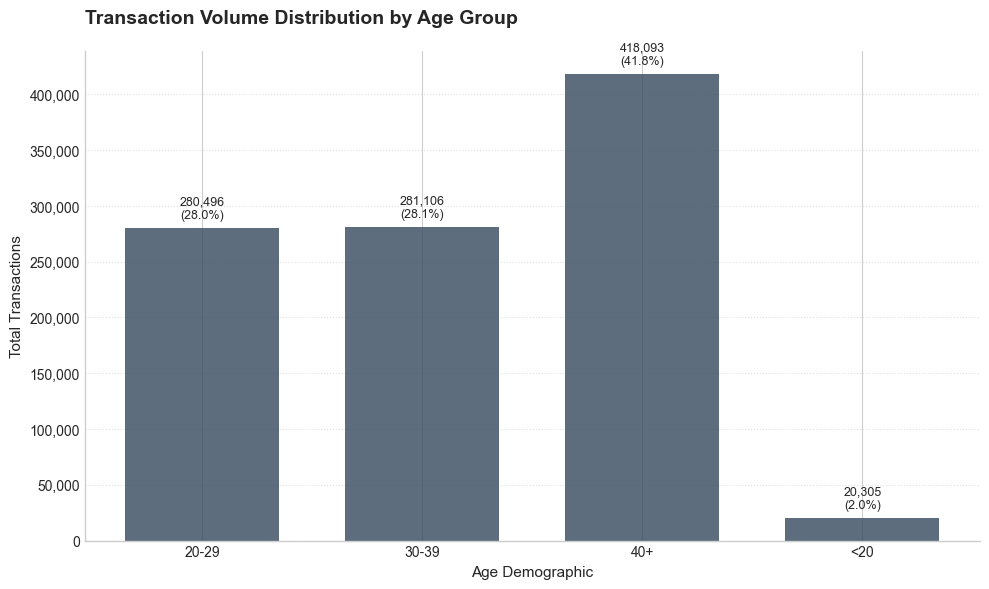

In [18]:
import matplotlib.pyplot as plt

# 1. Data Aggregation
age_dist = data_clean['age_group'].value_counts().sort_index()
total_records = len(data_clean)

# 2. Professional Visualization
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Using a professional muted blue
bars = ax.bar(age_dist.index, age_dist.values, color='#34495e', alpha=0.8, width=0.7)

# Styling
ax.set_title('Transaction Volume Distribution by Age Group', fontsize=14, fontweight='bold', loc='left', pad=20)
ax.set_ylabel('Total Transactions', fontsize=11)
ax.set_xlabel('Age Demographic', fontsize=11)

# Remove chart junk
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle=':', alpha=0.6)

# Formatting Y-axis and adding Percentage labels
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_records) * 100
    ax.annotate(f'{height:,}\n({percentage:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='medium')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_46252\1271918952.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_metrics.index, rotation=45, ha='right')


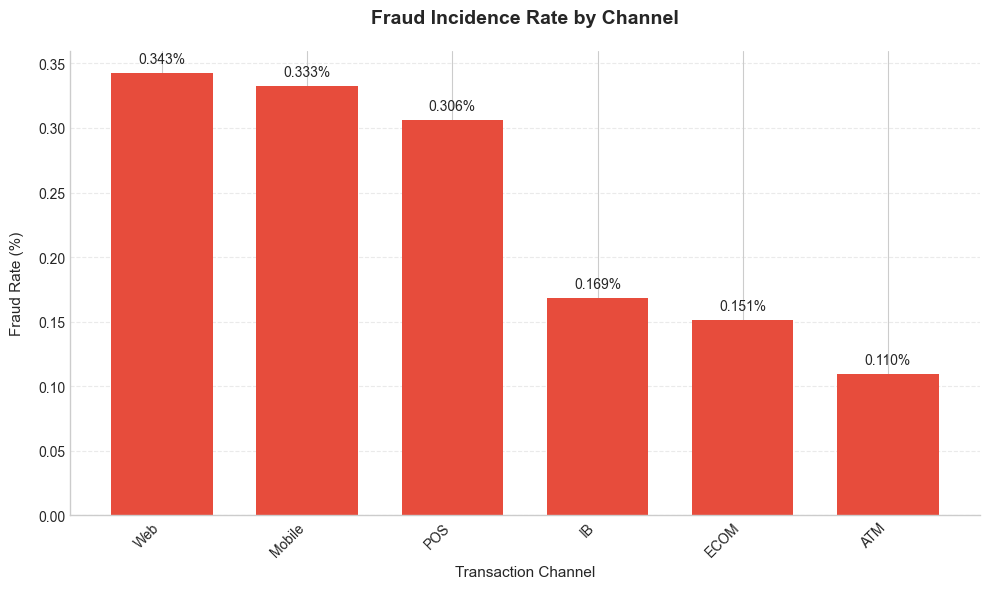

In [19]:
# 1. Data Aggregation
# Using a clear variable name and calculating the percentage in one readable step
channel_metrics = pd.crosstab(data_clean['channel'], data_clean['is_fraud'], normalize='index')[1] * 100
channel_metrics = channel_metrics.sort_values(ascending=False)

# 2. Visual Configuration
# Using the Object-Oriented Matplotlib interface for professional control
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Core Plotting
# Using a high-quality color palette and setting bar width
bars = ax.bar(channel_metrics.index, channel_metrics.values, color='#e74c3c', width=0.7)

# 4. Styling & Labels
ax.set_title('Fraud Incidence Rate by Channel', fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Fraud Rate (%)', fontsize=11, labelpad=10)
ax.set_xlabel('Transaction Channel', fontsize=11)

# Remove the top and right spines for a clean "modern" look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add gridlines only to the y-axis for better readability
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_xticklabels(channel_metrics.index, rotation=45, ha='right')

# 5. Annotation
# Adding clean percentage labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=10, fontweight='medium')

plt.tight_layout()
plt.show()

- Fraud distribution across hours 💎

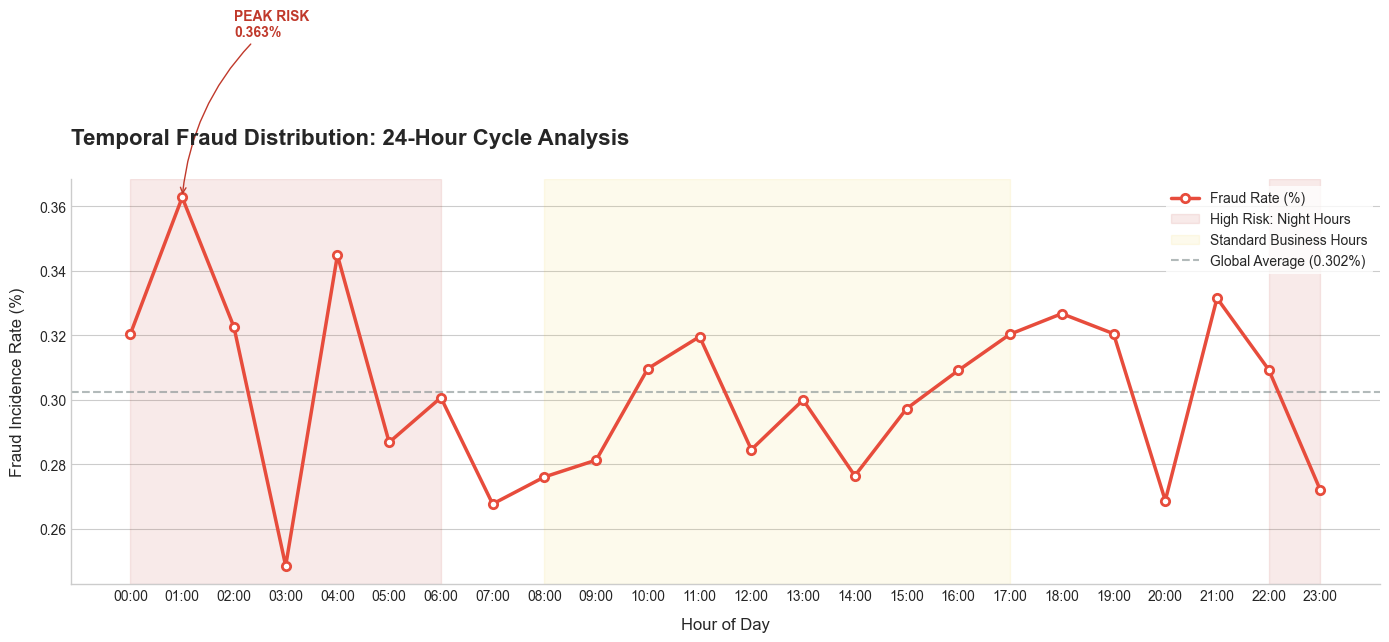


📊 TEMPORAL ANALYSIS SUMMARY
• OVERALL MEAN RATE   : 0.302%
• PEAK VULNERABILITY  : 0.363% at 01:00
• LOWEST RISK         : 0.248% at 03:00

STRATEGIC SEGMENTS:
• Night (22:00-06:00) : 0.308% (+1.7% vs Avg)
• Business (08:00-17:00): 0.297% (-1.6% vs Avg)



In [20]:

# --- 1. Data Preparation ---
# Calculate fraud rate by hour
fraud_rate_by_hour = data_clean.groupby('hour')['is_fraud'].mean() * 100

# Sorting once and storing in a cleaner Series
hourly_series = fraud_rate_by_hour.sort_index()
avg_rate = hourly_series.mean()

# --- 2. Visualization Setup ---
plt.style.use('seaborn-v0_8-whitegrid') # Professional, clean style
fig, ax = plt.subplots(figsize=(14, 7), dpi=100)

# --- 3. Plotting & Shading ---
# Plotting the main line with a slightly thinner, more elegant width
ax.plot(hourly_series.index, hourly_series.values, 
        color='#e74c3c', linewidth=2.5, marker='o', 
        markersize=6, markerfacecolor='white', markeredgewidth=2, 
        label='Fraud Rate (%)', zorder=3)

# Highlight zones with specific alpha levels for a professional "layered" look
ax.axvspan(0, 6, alpha=0.1, color='#c0392b', label='High Risk: Night Hours')
ax.axvspan(22, 23, alpha=0.1, color='#c0392b')
ax.axvspan(8, 17, alpha=0.08, color='#f1c40f', label='Standard Business Hours')

# Average baseline
ax.axhline(y=avg_rate, color='#7f8c8d', linestyle='--', alpha=0.6, 
           linewidth=1.5, label=f'Global Average ({avg_rate:.3f}%)')

# --- 4. Advanced Annotations ---
# Focus only on the peak to avoid visual clutter
peak_hour = hourly_series.idxmax()
peak_val = hourly_series.max()

ax.annotate(f'PEAK RISK\n{peak_val:.3f}%', 
            xy=(peak_hour, peak_val), 
            xytext=(peak_hour + 1, peak_val + 0.05),
            fontweight='bold', color='#c0392b',
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color='#c0392b'))

# --- 5. Aesthetics & Labels ---
ax.set_title('Temporal Fraud Distribution: 24-Hour Cycle Analysis', 
             fontsize=16, fontweight='bold', loc='left', pad=25)
ax.set_xlabel('Hour of Day', fontsize=12, labelpad=10)
ax.set_ylabel('Fraud Incidence Rate (%)', fontsize=12, labelpad=10)

ax.set_xticks(range(24))
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=0)

# Cleaning up the frame
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', visible=False) # Only keep horizontal grid for easier rate reading
ax.legend(frameon=True, facecolor='white', edgecolor='none', loc='upper right')

plt.tight_layout()
plt.show()

# --- 6. Professional Insights Summary ---
# Calculating metrics dynamically for the summary
night_hours = [22, 23, 0, 1, 2, 3, 4, 5, 6]
night_avg = hourly_series.loc[hourly_series.index.isin(night_hours)].mean()
biz_avg = hourly_series.loc[8:17].mean()

summary_template = f"""
{'='*70}
📊 TEMPORAL ANALYSIS SUMMARY
{'='*70}
• OVERALL MEAN RATE   : {avg_rate:.3f}%
• PEAK VULNERABILITY  : {peak_val:.3f}% at {peak_hour:02d}:00
• LOWEST RISK         : {hourly_series.min():.3f}% at {hourly_series.idxmin():02d}:00

STRATEGIC SEGMENTS:
• Night (22:00-06:00) : {night_avg:.3f}% ({(night_avg/avg_rate - 1)*100:+.1f}% vs Avg)
• Business (08:00-17:00): {biz_avg:.3f}% ({(biz_avg/avg_rate - 1)*100:+.1f}% vs Avg)
{'='*70}
"""
print(summary_template)

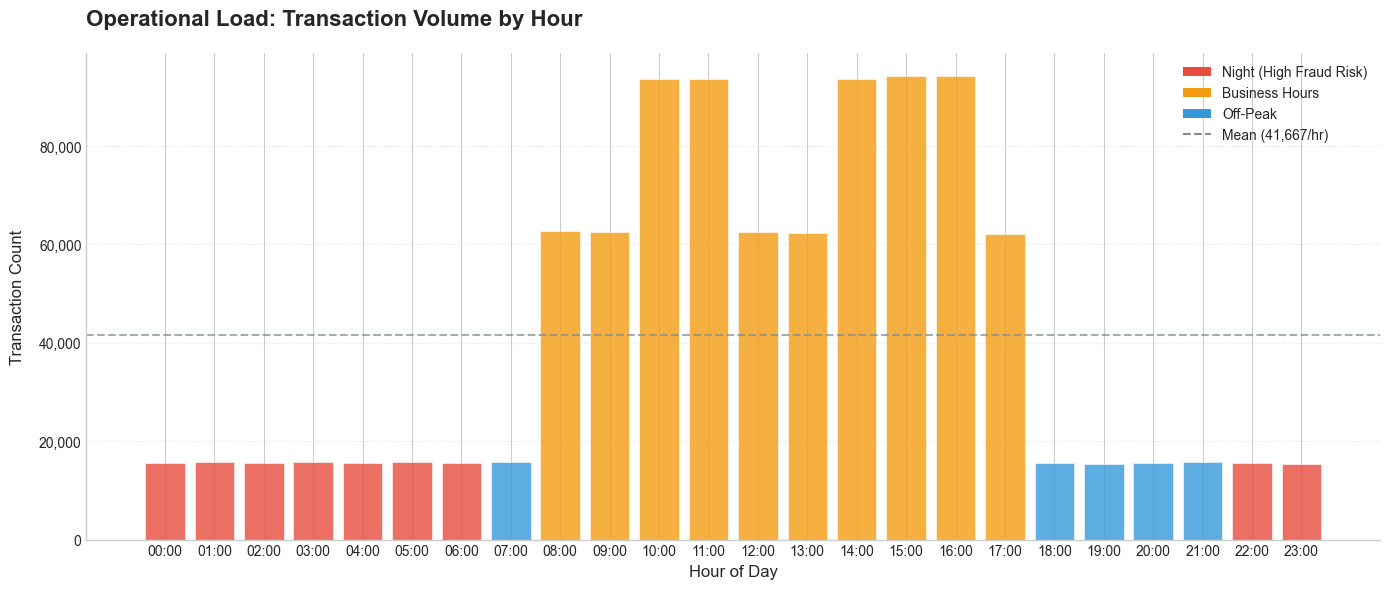

📊 TRANSACTION VOLUMETRICS REPORT
NIGHT (22-06)        | Total:  140,473 | Daily Share: 14.05% | Hourly Avg: 15,608
BUSINESS (08-17)     | Total:  781,614 | Daily Share: 78.16% | Hourly Avg: 78,161
OTHER                | Total:   77,913 | Daily Share:  7.79% | Hourly Avg: 15,583
--------------------------------------------------------------------------------
PEAK THROUGHPUT     : 94,213 tx/hr at 15:00
MINIMUM THROUGHPUT  : 15,290 tx/hr at 19:00
TOTAL DAILY VOLUME  : 1,000,000


In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- 1. Data Aggregation & Logic ---
hourly_counts = data_clean.groupby('hour').size().sort_index()
total_tx = hourly_counts.sum()
avg_tx = hourly_counts.mean()

# Define hour segments for logic and styling
night_hours = [22, 23, 0, 1, 2, 3, 4, 5, 6]
biz_hours = list(range(8, 18))

# Define colors for segments
def get_hour_color(hour):
    if hour in night_hours: return '#e74c3c'  # Alert Red
    if hour in biz_hours:  return '#f39c12'  # Warning Orange
    return '#3498db'                         # Neutral Blue

colors = [get_hour_color(h) for h in hourly_counts.index]

# --- 2. Visualization ---
fig, ax = plt.subplots(figsize=(14, 6), dpi=100)

bars = ax.bar(hourly_counts.index, hourly_counts.values, 
              color=colors, alpha=0.8, edgecolor='white', linewidth=0.5)

# Style Refinement
ax.axhline(avg_tx, color='#7f8c8d', linestyle='--', linewidth=1.5, alpha=0.7)
ax.set_title('Operational Load: Transaction Volume by Hour', fontsize=16, fontweight='bold', loc='left', pad=20)
ax.set_ylabel('Transaction Count', fontsize=12, labelpad=10)
ax.set_xlabel('Hour of Day', fontsize=12)

# Formatting axes
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle=':', alpha=0.6)

# Professional Legend
legend_elements = [
    Patch(facecolor='#e74c3c', label='Night (High Fraud Risk)'),
    Patch(facecolor='#f39c12', label='Business Hours'),
    Patch(facecolor='#3498db', label='Off-Peak'),
    plt.Line2D([0], [0], color='#7f8c8d', linestyle='--', label=f'Mean ({avg_tx:,.0f}/hr)')
]
ax.legend(handles=legend_elements, frameon=False, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# --- 3. Professional Performance Summary ---
def get_segment_stats(name, hours_list):
    subset = hourly_counts.loc[hourly_counts.index.isin(hours_list)]
    return {
        'name': name,
        'total': subset.sum(),
        'pct': (subset.sum() / total_tx) * 100,
        'avg': subset.mean()
    }

segments = [
    get_segment_stats("NIGHT (22-06)", night_hours),
    get_segment_stats("BUSINESS (08-17)", biz_hours),
    get_segment_stats("OTHER", [h for h in range(24) if h not in night_hours + biz_hours])
]

print(f"{'='*80}\n📊 TRANSACTION VOLUMETRICS REPORT\n{'='*80}")
for s in segments:
    print(f"{s['name']:<20} | Total: {s['total']:>8,} | Daily Share: {s['pct']:>5.2f}% | Hourly Avg: {s['avg']:>6,.0f}")

print(f"{'-'*80}")
print(f"PEAK THROUGHPUT     : {hourly_counts.max():,} tx/hr at {hourly_counts.idxmax():02d}:00")
print(f"MINIMUM THROUGHPUT  : {hourly_counts.min():,} tx/hr at {hourly_counts.idxmin():02d}:00")
print(f"TOTAL DAILY VOLUME  : {total_tx:,}\n{'='*80}")

- Fraud rate across channel 💎

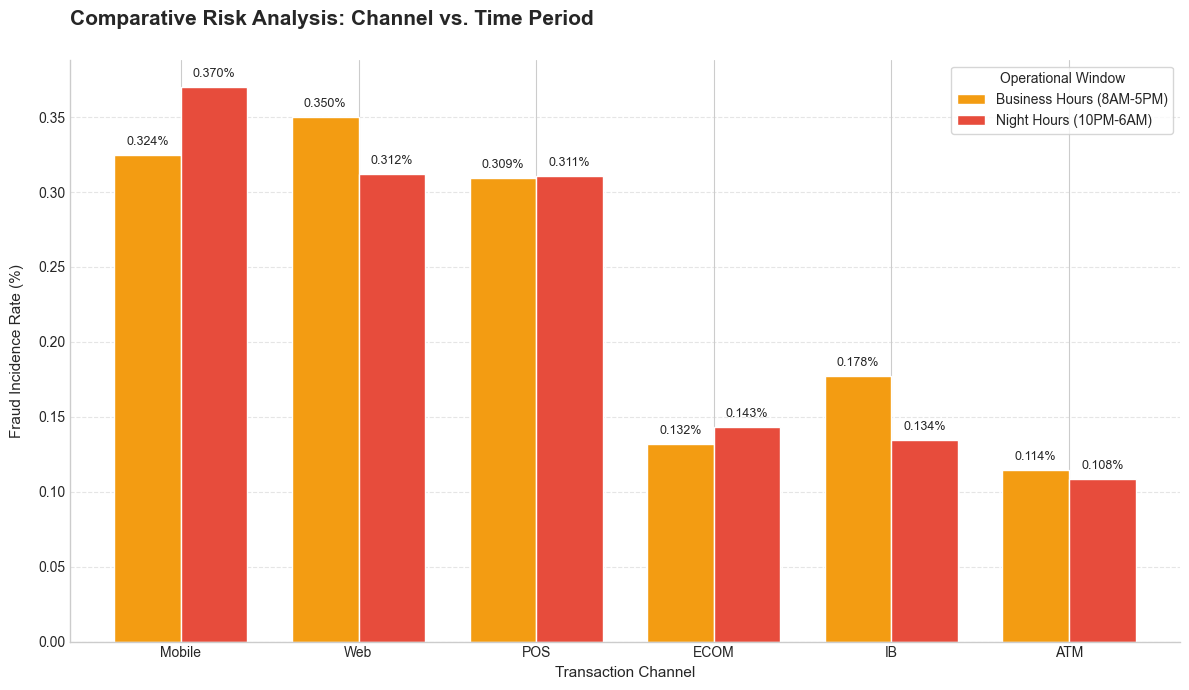

📊 STRATEGIC RISK REPORT: TEMPORAL CHANNEL ANALYSIS
CHANNEL: MOBILE          | ⚠️  HIGH RISK
  └─ Business:  0.324% | Night:  0.370%
  └─ Analysis: Increased risk: 0.045% (+14.0%)

CHANNEL: WEB             | ✅ SAFER
  └─ Business:  0.350% | Night:  0.312%
  └─ Analysis: Reduced risk: 0.038%

CHANNEL: POS             | ⚠️  HIGH RISK
  └─ Business:  0.309% | Night:  0.311%
  └─ Analysis: Increased risk: 0.002% (+0.6%)

CHANNEL: ECOM            | ⚠️  HIGH RISK
  └─ Business:  0.132% | Night:  0.143%
  └─ Analysis: Increased risk: 0.011% (+8.5%)

CHANNEL: IB              | ✅ SAFER
  └─ Business:  0.178% | Night:  0.134%
  └─ Analysis: Reduced risk: 0.043%

CHANNEL: ATM             | ✅ SAFER
  └─ Business:  0.114% | Night:  0.108%
  └─ Analysis: Reduced risk: 0.006%



In [22]:
# --- 1. Efficient Feature Engineering ---
# Using np.select is more performant and cleaner than multiple .loc calls
import numpy as np
conditions = [
    data_clean['hour'].between(8, 17),
    data_clean['hour'].isin([22, 23, 0, 1, 2, 3, 4, 5, 6])
]
choices = ['Business Hours (8AM-5PM)', 'Night Hours (10PM-6AM)']
data_clean['time_period'] = np.select(conditions, choices, default='Other')

# --- 2. Vectorized Statistical Aggregation ---
# Grouping by both dimensions and calculating the mean of 'is_fraud' (which is the rate)
metrics = (
    data_clean.groupby(['channel', 'time_period'])['is_fraud']
    .agg(['mean', 'count'])
    .reset_index()
)
metrics['fraud_rate_pct'] = metrics['mean'] * 100

# Create a clean pivot for the visualization
pivot_df = metrics.pivot(index='channel', columns='time_period', values='fraud_rate_pct')
# Filter out 'Other' for a cleaner comparison if preferred, or keep all
pivot_df = pivot_df[['Business Hours (8AM-5PM)', 'Night Hours (10PM-6AM)']].sort_values('Night Hours (10PM-6AM)', ascending=False)

# --- 3. Professional Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)

# Professional Grouped Bar Chart
pivot_df.plot(kind='bar', ax=ax, color=['#f39c12', '#e74c3c'], width=0.75, edgecolor='white', linewidth=1)

# Styling
ax.set_title('Comparative Risk Analysis: Channel vs. Time Period', fontsize=15, fontweight='bold', loc='left', pad=25)
ax.set_ylabel('Fraud Incidence Rate (%)', fontsize=11, labelpad=10)
ax.set_xlabel('Transaction Channel', fontsize=11)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adding clear bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f%%', padding=5, fontsize=9, fontweight='medium')

ax.legend(title='Operational Window', frameon=True, facecolor='white')
plt.xticks(rotation=0) # Professional charts prefer horizontal labels when possible
plt.tight_layout()
plt.show()

# --- 4. High-Fidelity Intelligence Summary ---
print(f"{'='*90}\n📊 STRATEGIC RISK REPORT: TEMPORAL CHANNEL ANALYSIS\n{'='*90}")

# Calculating differences for the summary logic
pivot_df['Diff'] = pivot_df['Night Hours (10PM-6AM)'] - pivot_df['Business Hours (8AM-5PM)']
pivot_df['Risk_Increase'] = (pivot_df['Diff'] / pivot_df['Business Hours (8AM-5PM)']) * 100

for channel, row in pivot_df.iterrows():
    status = "⚠️  HIGH RISK" if row['Diff'] > 0 else "✅ SAFER"
    trend = f"Increased risk: {row['Diff']:.3f}% (+{row['Risk_Increase']:.1f}%)" if row['Diff'] > 0 else f"Reduced risk: {abs(row['Diff']):.3f}%"
    
    print(f"CHANNEL: {channel.upper():<15} | {status}")
    print(f"  └─ Business: {row['Business Hours (8AM-5PM)']:>6.3f}% | Night: {row['Night Hours (10PM-6AM)']:>6.3f}%")
    print(f"  └─ Analysis: {trend}\n")

print(f"{'='*90}")

- Fraud incident rate by volume💎

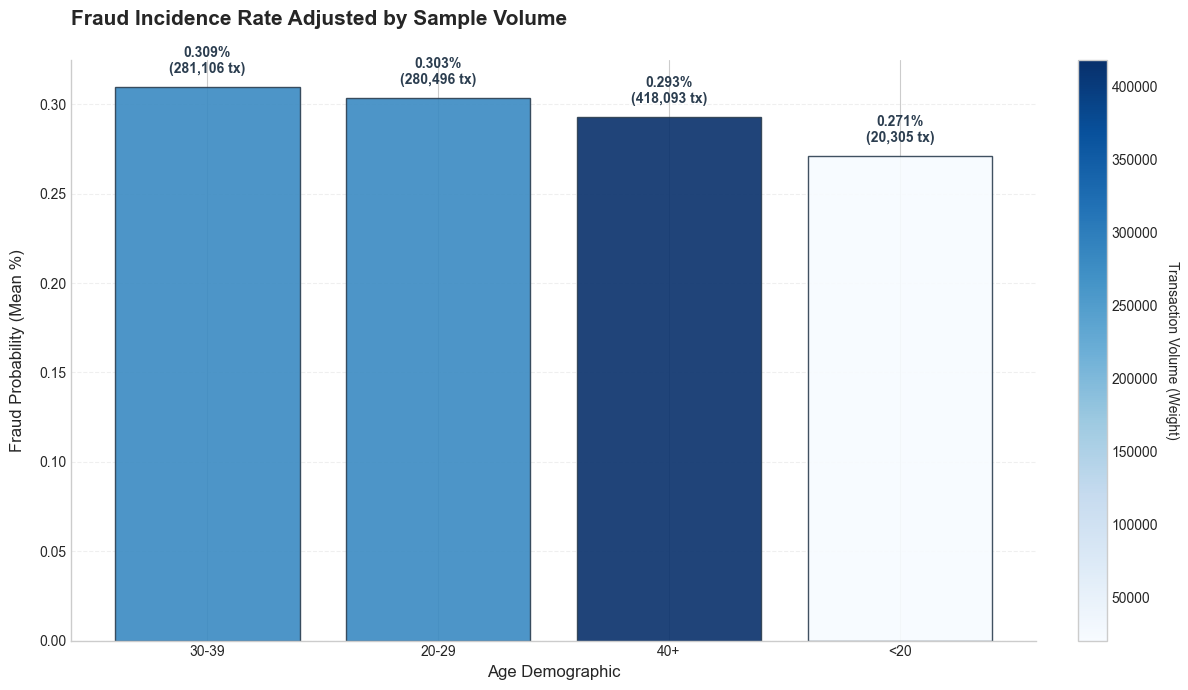

In [23]:
# --- 1. Data Aggregation ---
# Calculating Rate (Mean) and Volume (Count) simultaneously
age_metrics = data_clean.groupby('age_group')['is_fraud'].agg(['mean', 'count'])
age_metrics['rate_pct'] = age_metrics['mean'] * 100
age_metrics = age_metrics.sort_values('rate_pct', ascending=False)

# --- 2. Professional Visualization ---
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)

# We use a color gradient based on Volume (Count) 
# This visually highlights that 40+ has more data "weight"
norm = plt.Normalize(age_metrics['count'].min(), age_metrics['count'].max())
colors = plt.cm.Blues(norm(age_metrics['count']))

bars = ax.bar(age_metrics.index, age_metrics['rate_pct'], 
              color=colors, alpha=0.9, edgecolor='#2c3e50', linewidth=1)

# --- 3. Styling & Context ---
ax.set_title('Fraud Incidence Rate Adjusted by Sample Volume', 
             fontsize=15, fontweight='bold', loc='left', pad=25)
ax.set_ylabel('Fraud Probability (Mean %)', fontsize=12, labelpad=10)
ax.set_xlabel('Age Demographic', fontsize=12)

# Remove spines for modern look
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# --- 4. Intelligent Labeling ---
# We add the Rate (%) AND the raw Count to the top of each bar
for bar, count in zip(bars, age_metrics['count']):
    height = bar.get_height()
    ax.annotate(f'{height:.3f}%\n({count:,} tx)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 8), textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='#2c3e50')

# Add a colorbar to explain the "Volume" shading
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Transaction Volume (Weight)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

- Transaction Distribution 💎

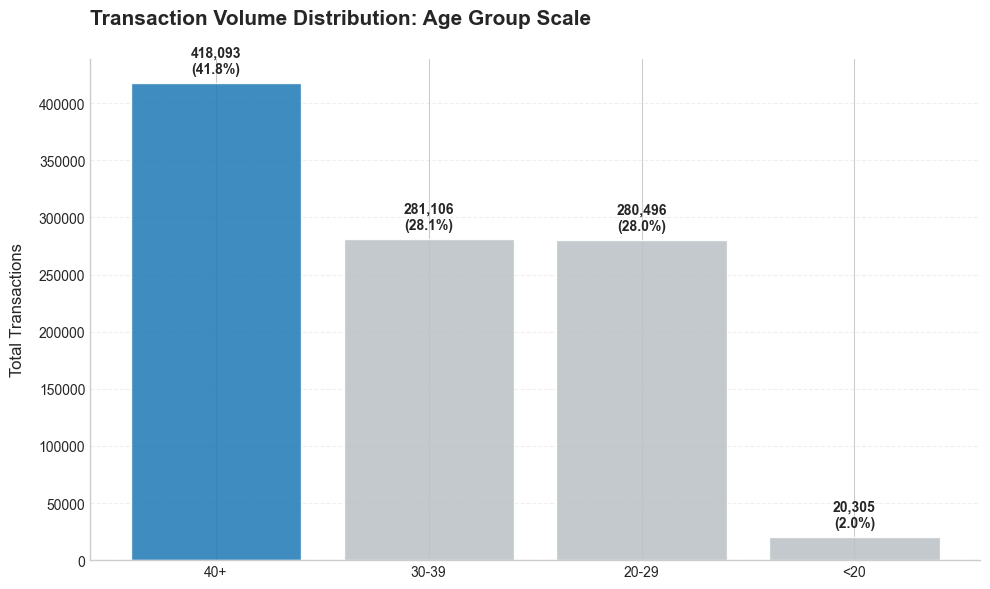

ANALYSIS: The '40+' group volume is 2.16x the average of other groups.


In [24]:


# --- 1. Data Preparation ---
# Sorting by count to emphasize the volume distribution you observed
age_volume = data_clean['age_group'].value_counts().sort_values(ascending=False)

# --- 2.  Visualization ---
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Creating a conditional color palette: Highlight the '40+' group to show it's "Times 2"
colors = ['#2980b9' if (x == '40+') else '#bdc3c7' for x in age_volume.index]

bars = ax.bar(age_volume.index, age_volume.values, 
              color=colors, alpha=0.9, edgecolor='white', linewidth=1)

# --- 3. Styling & Annotations ---
ax.set_title('Transaction Volume Distribution: Age Group Scale', 
             fontsize=15, fontweight='bold', loc='left', pad=25)
ax.set_ylabel('Total Transactions', fontsize=12, labelpad=10)

# Remove top/right spines for a clean, modern look
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3, zorder=0)
ax.set_axisbelow(True) # Ensure grid is behind bars

# --- 4. Intelligent Labeling ---
# Adding comma-formatted counts and "Percentage of Total" for context
total_count = age_volume.sum()
for bar in bars:
    height = bar.get_height()
    pct = (height / total_count) * 100
    ax.annotate(f'{height:,}\n({pct:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# --- 5. Engineering Note ---
# Printing the exact "Times 2" ratio for the report
ratio = age_volume['40+'] / age_volume[age_volume.index != '40+'].mean()
print(f"ANALYSIS: The '40+' group volume is {ratio:.2f}x the average of other groups.")

- Filtering for fraud cases 💎

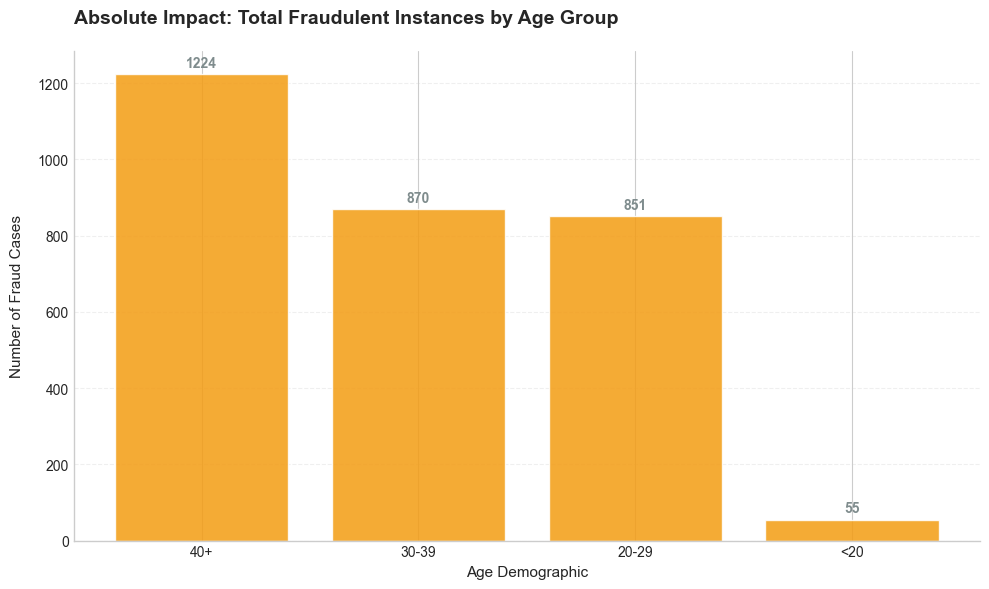

🚨 FRAUD VOLUME AUDIT: ABSOLUTE CASE COUNTS
GROUP: 40+        | CASES: 1224 | SHARE:  40.8%
GROUP: 30-39      | CASES:  870 | SHARE:  29.0%
GROUP: 20-29      | CASES:  851 | SHARE:  28.4%
GROUP: <20        | CASES:   55 | SHARE:   1.8%


In [25]:


# --- 1. Data Aggregation ---
# Filtering for fraud cases and counting by group
# We sort by the count to provide a clear ranking of impact
fraud_counts = (
    data_clean[data_clean['is_fraud'] == 1]['age_group']
    .value_counts()
    .sort_values(ascending=False)
)

# --- 2. Professional Visualization ---
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Using a distinct 'Warning' color (Orange) for volume-based risk
bars = ax.bar(fraud_counts.index, fraud_counts.values, 
              color='#f39c12', alpha=0.85, edgecolor='white', linewidth=1)

# --- 3. Styling & Modern Aesthetics ---
ax.set_title('Absolute Impact: Total Fraudulent Instances by Age Group', 
             fontsize=14, fontweight='bold', loc='left', pad=20)
ax.set_ylabel('Number of Fraud Cases', fontsize=11, labelpad=10)
ax.set_xlabel('Age Demographic', fontsize=11)

# Remove chart junk (spines and heavy grids)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# --- 4. High-Precision Labeling ---
# Using ax.bar_label for clean, vectorized annotation
ax.bar_label(bars, padding=3, fontsize=10, fontweight='bold', color='#7f8c8d')

plt.tight_layout()
plt.show()

# --- 5. Engineering Summary ---
total_fraud = fraud_counts.sum()
print(f"{'='*60}\n🚨 FRAUD VOLUME AUDIT: ABSOLUTE CASE COUNTS\n{'='*60}")
for age, count in fraud_counts.items():
    share = (count / total_fraud) * 100
    print(f"GROUP: {age:<10} | CASES: {count:>4} | SHARE: {share:>5.1f}%")
print(f"{'='*60}")

- Age Group vs Channel Analysis 💎

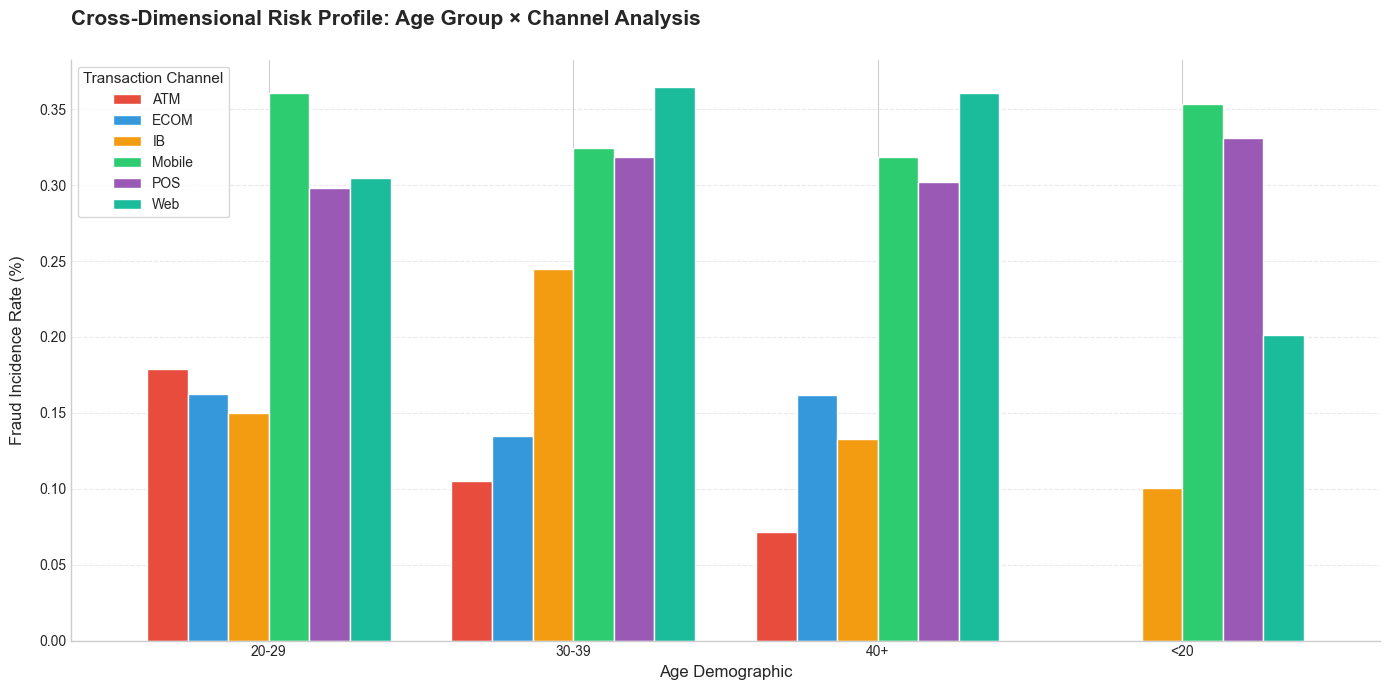

📊 AGE × CHANNEL RISK MATRIX

🔹 AGE GROUP: 20-29
  ⚠️  HIGHEST RISK: Mobile (0.361%)
  ✅ LOWEST RISK:  IB (0.150%)
  📊 RISK SPREAD:  0.211%

🔹 AGE GROUP: 30-39
  ⚠️  HIGHEST RISK: Web (0.364%)
  ✅ LOWEST RISK:  ATM (0.105%)
  📊 RISK SPREAD:  0.259%

🔹 AGE GROUP: 40+
  ⚠️  HIGHEST RISK: Web (0.361%)
  ✅ LOWEST RISK:  ATM (0.071%)
  📊 RISK SPREAD:  0.289%

🔹 AGE GROUP: <20
  ⚠️  HIGHEST RISK: Mobile (0.353%)
  ✅ LOWEST RISK:  ATM (0.000%)
  📊 RISK SPREAD:  0.353%



In [26]:
# --- 1. Data Aggregation ---
# Calculate fraud rate for each Age Group x Channel combination
age_channel_metrics = (
    data_clean.groupby(['age_group', 'channel'])['is_fraud']
    .agg(['mean', 'count'])
    .reset_index()
)
age_channel_metrics['fraud_rate_pct'] = age_channel_metrics['mean'] * 100

# Pivot for visualization: Age groups on x-axis, Channels as grouped bars
pivot_age_channel = age_channel_metrics.pivot(
    index='age_group', 
    columns='channel', 
    values='fraud_rate_pct'
)

# --- 2. Professional Visualization ---
fig, ax = plt.subplots(figsize=(14, 7), dpi=100)

# Create grouped bar chart with professional color palette
pivot_age_channel.plot(
    kind='bar', 
    ax=ax, 
    color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71', '#9b59b6', '#1abc9c'],
    width=0.8, 
    edgecolor='white', 
    linewidth=1
)

# --- 3. Styling & Aesthetics ---
ax.set_title('Cross-Dimensional Risk Profile: Age Group × Channel Analysis', 
             fontsize=15, fontweight='bold', loc='left', pad=25)
ax.set_ylabel('Fraud Incidence Rate (%)', fontsize=12, labelpad=10)
ax.set_xlabel('Age Demographic', fontsize=12)
ax.set_xticklabels(pivot_age_channel.index, rotation=0)

# Remove spines for clean look
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Professional legend positioning
ax.legend(title='Transaction Channel', frameon=True, facecolor='white', 
          loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

# --- 4. Intelligence Report ---
print(f"{'='*90}\n📊 AGE × CHANNEL RISK MATRIX\n{'='*90}")

for age in pivot_age_channel.index:
    print(f"\n🔹 AGE GROUP: {age}")
    age_data = pivot_age_channel.loc[age].sort_values(ascending=False)
    
    highest_risk_channel = age_data.idxmax()
    highest_risk_rate = age_data.max()
    lowest_risk_channel = age_data.idxmin()
    lowest_risk_rate = age_data.min()
    
    print(f"  ⚠️  HIGHEST RISK: {highest_risk_channel} ({highest_risk_rate:.3f}%)")
    print(f"  ✅ LOWEST RISK:  {lowest_risk_channel} ({lowest_risk_rate:.3f}%)")
    print(f"  📊 RISK SPREAD:  {highest_risk_rate - lowest_risk_rate:.3f}%")

print(f"\n{'='*90}")

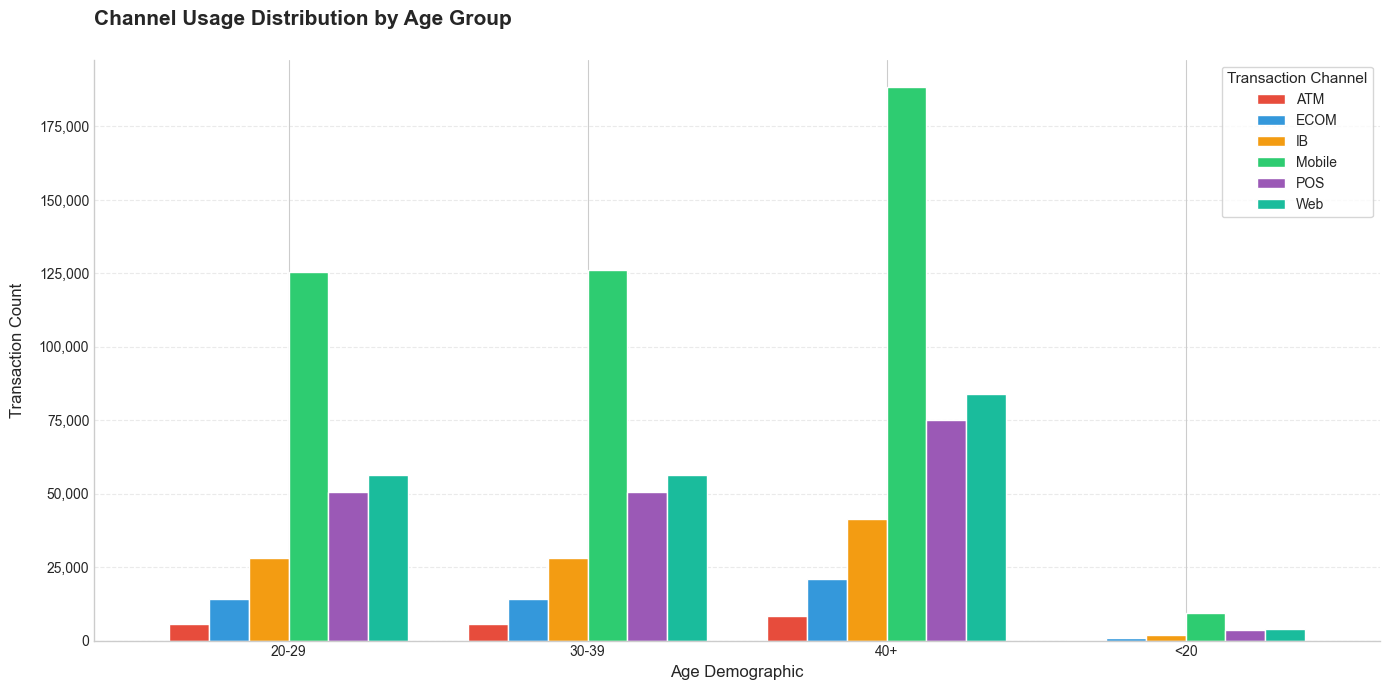

📊 CHANNEL PREFERENCE ANALYSIS BY AGE GROUP

🔹 AGE GROUP: 20-29
  Total Transactions: 280,496

  1. Mobile   | 125,558 tx |  44.8%
  2. Web      |  56,498 tx |  20.1%
  3. POS      |  50,693 tx |  18.1%
  4. IB       |  28,017 tx |  10.0%
  5. ECOM     |  14,144 tx |   5.0%
  6. ATM      |   5,586 tx |   2.0%

🔹 AGE GROUP: 30-39
  Total Transactions: 281,106

  1. Mobile   | 126,313 tx |  44.9%
  2. Web      |  56,252 tx |  20.0%
  3. POS      |  50,565 tx |  18.0%
  4. IB       |  28,177 tx |  10.0%
  5. ECOM     |  14,089 tx |   5.0%
  6. ATM      |   5,710 tx |   2.0%

🔹 AGE GROUP: 40+
  Total Transactions: 418,093

  1. Mobile   | 188,310 tx |  45.0%
  2. Web      |  83,769 tx |  20.0%
  3. POS      |  75,155 tx |  18.0%
  4. IB       |  41,469 tx |   9.9%
  5. ECOM     |  20,976 tx |   5.0%
  6. ATM      |   8,414 tx |   2.0%

🔹 AGE GROUP: <20
  Total Transactions: 20,305

  1. Mobile   |   9,341 tx |  46.0%
  2. Web      |   3,969 tx |  19.5%
  3. POS      |   3,622 tx |  17.8%
  

In [27]:
# --- 1. Data Aggregation ---
# Count transactions by Age Group and Channel
age_channel_volume = (
    data_clean.groupby(['age_group', 'channel'])
    .size()
    .reset_index(name='transaction_count')
)

# Pivot for grouped bar chart: Age groups on x-axis, Channels as bars
pivot_volume = age_channel_volume.pivot(
    index='age_group',
    columns='channel',
    values='transaction_count'
)

# Calculate percentage within each age group
pivot_pct = pivot_volume.div(pivot_volume.sum(axis=1), axis=0) * 100

# --- 2. Professional Visualization ---
fig, ax = plt.subplots(figsize=(14, 7), dpi=100)

# Create grouped bar chart
pivot_volume.plot(
    kind='bar',
    ax=ax,
    color=['#e74c3c', '#3498db', '#f39c12', '#2ecc71', '#9b59b6', '#1abc9c'],
    width=0.8,
    edgecolor='white',
    linewidth=1
)

# --- 3. Styling ---
ax.set_title('Channel Usage Distribution by Age Group', 
             fontsize=15, fontweight='bold', loc='left', pad=25)
ax.set_ylabel('Transaction Count', fontsize=12, labelpad=10)
ax.set_xlabel('Age Demographic', fontsize=12)
ax.set_xticklabels(pivot_volume.index, rotation=0)

# Format y-axis with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Remove spines
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legend
ax.legend(title='Transaction Channel', frameon=True, facecolor='white',
          loc='upper right', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

# --- 4. Detailed Analysis Report ---
print(f"{'='*90}\n📊 CHANNEL PREFERENCE ANALYSIS BY AGE GROUP\n{'='*90}")

for age in pivot_volume.index:
    print(f"\n🔹 AGE GROUP: {age}")
    age_data = pivot_volume.loc[age].sort_values(ascending=False)
    age_pct = pivot_pct.loc[age].sort_values(ascending=False)
    total = age_data.sum()
    
    print(f"  Total Transactions: {total:,}\n")
    
    for i, (channel, count) in enumerate(age_data.items(), 1):
        pct = age_pct[channel]
        print(f"  {i}. {channel:<8} | {count:>7,} tx | {pct:>5.1f}%")

print(f"\n{'='*90}")

- Velocity Score Temporal Analysis 💎

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Vectorized aggregation: calculate mean velocity for both classes at once
velocity_stats = data_clean.groupby(['hour', 'is_fraud'])['velocity_score'].mean().unstack()
velocity_stats.columns = ['Legitimate', 'Fraudulent']

# Calculate the Delta (Differential) for the second analysis
velocity_stats['Delta'] = velocity_stats['Fraudulent'] - velocity_stats['Legitimate']

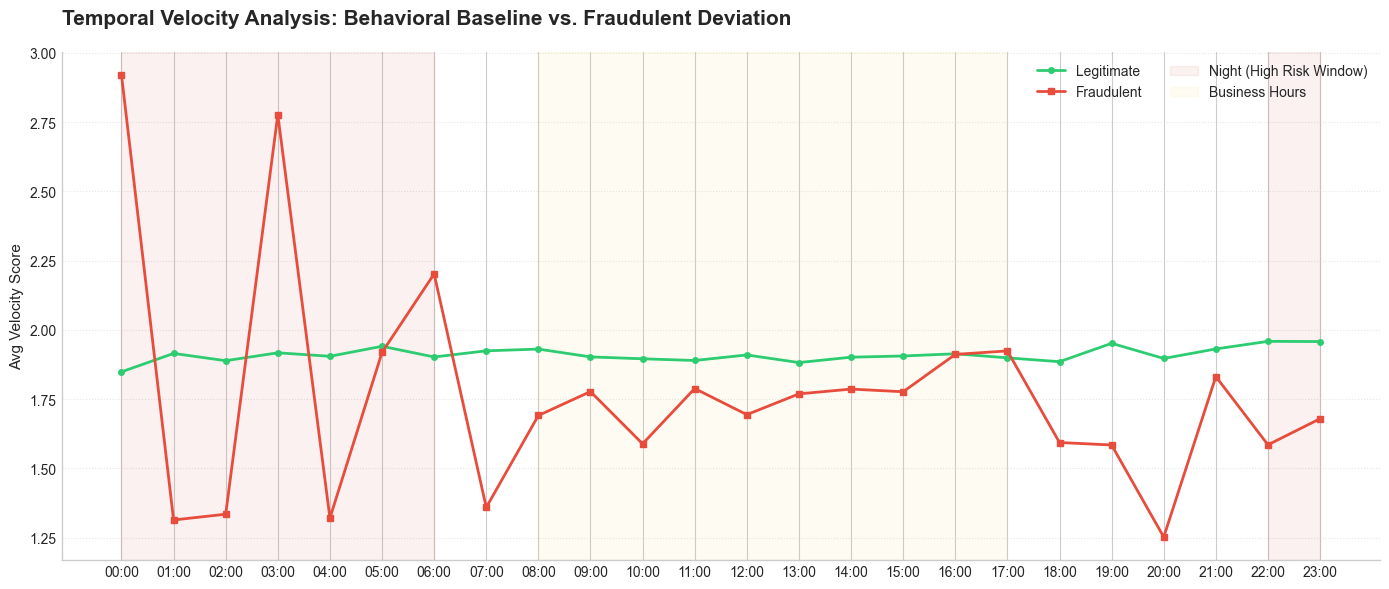

In [31]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=100)

# Main Plotting
ax.plot(velocity_stats.index, velocity_stats['Legitimate'], 
        color='#2ecc71', lw=2, marker='o', ms=4, label='Legitimate', zorder=3)
ax.plot(velocity_stats.index, velocity_stats['Fraudulent'], 
        color='#e74c3c', lw=2, marker='s', ms=4, label='Fraudulent', zorder=3)

# Strategic Overlays (Time Bands)
ax.axvspan(0, 6, alpha=0.07, color='#c0392b', label='Night (High Risk Window)')
ax.axvspan(22, 23, alpha=0.07, color='#c0392b')
ax.axvspan(8, 17, alpha=0.05, color='#f1c40f', label='Business Hours')

# Aesthetics
ax.set_title('Temporal Velocity Analysis: Behavioral Baseline vs. Fraudulent Deviation', 
             fontsize=15, fontweight='bold', loc='left', pad=20)
ax.set_ylabel('Avg Velocity Score', fontsize=11)
ax.set_xticks(range(24))
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)])
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle=':', alpha=0.5)
ax.legend(frameon=False, loc='upper right', ncol=2)

plt.tight_layout()
plt.show()

- VELOCITY SCORE CHANNEL ANALYSIS 💎

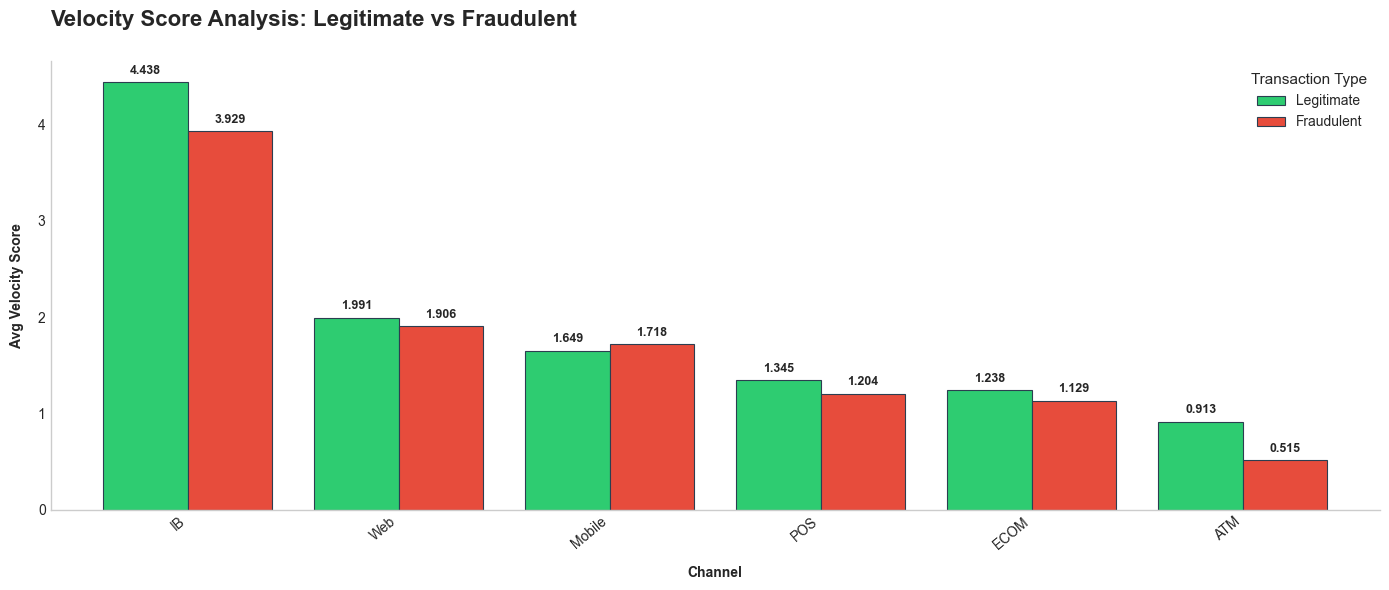


======================== VELOCITY ANALYSIS SUMMARY ========================
CHANNEL            | LEGIT      | FRAUD      | DELTA      | STATUS
---------------------------------------------------------------------------
IB                 | 4.4380     | 3.9290     | -0.5090    | ✅ STABLE (-11.5%)
WEB                | 1.9906     | 1.9057     | -0.0849    | ✅ STABLE (-4.3%)
MOBILE             | 1.6491     | 1.7182     | 0.0690     | ⚠️ HIGH RISK (+4.2%)
POS                | 1.3445     | 1.2039     | -0.1406    | ✅ STABLE (-10.5%)
ECOM               | 1.2382     | 1.1291     | -0.1091    | ✅ STABLE (-8.8%)
ATM                | 0.9129     | 0.5154     | -0.3975    | ✅ STABLE (-43.5%)


In [47]:
# --- 1. Data Aggregation (Optimized Chaining) ---
# We use unstack() instead of pivot for a cleaner pipeline
velocity_pivot = (
    data_clean.groupby(['channel', 'is_fraud'])['velocity_score']
    .mean()
    .unstack(level='is_fraud')
    .rename(columns={0: 'Legitimate', 1: 'Fraudulent'})
    .sort_values('Fraudulent', ascending=False)
)

# --- 2. Professional Visualization ---
sns.set_style("whitegrid", {'axes.grid': False})
fig, ax = plt.subplots(figsize=(14, 6), dpi=100)

velocity_pivot.plot(
    kind='bar', 
    ax=ax, 
    color=['#2ecc71', '#e74c3c'], 
    width=0.8,
    edgecolor='#2c3e50',
    linewidth=0.8
)

# Refined Aesthetics
ax.set_title('Velocity Score Analysis: Legitimate vs Fraudulent', loc='left', fontsize=16, fontweight='bold', pad=25)
ax.set_ylabel('Avg Velocity Score', fontweight='semibold', labelpad=10)
ax.set_xlabel('Channel', fontweight='semibold', labelpad=10)
ax.set_xticklabels(velocity_pivot.index, rotation=40, ha='right')

# Remove top/right spines for a modern look
sns.despine()

# Add value labels with high precision
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=4, fontsize=9, fontweight='bold')

plt.legend(title='Transaction Type', title_fontsize='11', frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

# --- 3. Statistical Summary (Clean Table Output) ---
header = f"{'CHANNEL':<18} | {'LEGIT':<10} | {'FRAUD':<10} | {'DELTA':<10} | {'STATUS'}"
print(f"\n{' VELOCITY ANALYSIS SUMMARY ':=^75}\n{header}\n{'-'*75}")

for channel, metrics in velocity_pivot.iterrows():
    legit, fraud = metrics['Legitimate'], metrics['Fraudulent']
    diff = fraud - legit
    pct = (diff / legit * 100) if legit > 0 else 0
    
    # Logic for status flag
    indicator = "⚠️ HIGH RISK" if diff > 0 else "✅ STABLE"
    
    print(f"{channel.upper():<18} | {legit:<10.4f} | {fraud:<10.4f} | {diff:<10.4f} | {indicator} ({pct:+.1f}%)")

- Bank Fraud Rate Analysis 💎

C:\Users\USER\AppData\Local\Temp\ipykernel_46252\490416431.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(bank_metrics['bank'], rotation=40, ha='right')


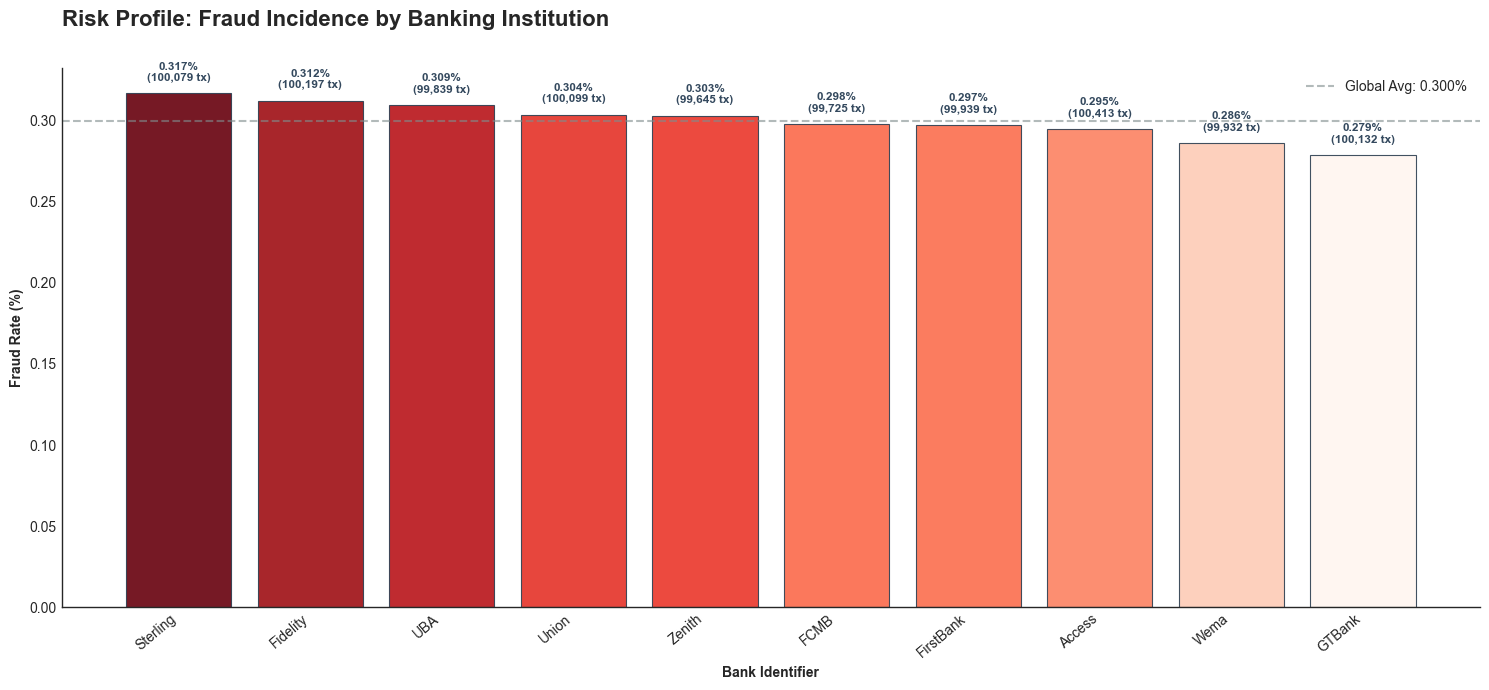


============================ BANK FRAUD RISK ASSESSMENT =============================
Global Metrics | Avg: 0.300% | Max: 0.317% | Min: 0.279%
-------------------------------------------------------------------------------------
BANKING INSTITUTION       | FRAUD %    | VOLUME       | DEVIATION    | STATUS
-------------------------------------------------------------------------------------
STERLING                  | 0.317      | 100,079      |     +0.017% | 🟡 NOMINAL
FIDELITY                  | 0.312      | 100,197      |     +0.012% | 🟡 NOMINAL
UBA                       | 0.309      | 99,839       |     +0.009% | 🟡 NOMINAL
UNION                     | 0.304      | 100,099      |     +0.004% | 🟡 NOMINAL
ZENITH                    | 0.303      | 99,645       |     +0.003% | 🟡 NOMINAL
FCMB                      | 0.298      | 99,725       |     -0.002% | 🟡 NOMINAL
FIRSTBANK                 | 0.297      | 99,939       |     -0.003% | 🟡 NOMINAL
ACCESS                    | 0.295      | 100,4

In [48]:
# --- 1. Data Aggregation (Optimized Pipeline) ---
bank_metrics = (
    data_clean.groupby('bank')['is_fraud']
    .agg(fraud_rate_pct=lambda x: x.mean() * 100, transaction_count='count')
    .sort_values('fraud_rate_pct', ascending=False)
    .reset_index()
)

# --- 2. Professional Visualization ---
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15, 7), dpi=100)

# Apply dynamic gradient based on fraud rate
norm = plt.Normalize(bank_metrics['fraud_rate_pct'].min(), bank_metrics['fraud_rate_pct'].max())
colors = plt.cm.Reds(norm(bank_metrics['fraud_rate_pct']))

bars = ax.bar(
    bank_metrics['bank'], bank_metrics['fraud_rate_pct'],
    color=colors, alpha=0.9, edgecolor='#2c3e50', linewidth=0.8
)

# Contextual baseline
avg_rate = bank_metrics['fraud_rate_pct'].mean()
ax.axhline(avg_rate, color='#7f8c8d', linestyle='--', alpha=0.6, label=f'Global Avg: {avg_rate:.3f}%')

# Styling & Labeling
ax.set_title('Risk Profile: Fraud Incidence by Banking Institution', loc='left', fontsize=16, fontweight='bold', pad=30)
ax.set_ylabel('Fraud Rate (%)', fontweight='semibold')
ax.set_xlabel('Bank Identifier', fontweight='semibold')
ax.set_xticklabels(bank_metrics['bank'], rotation=40, ha='right')
sns.despine()

# Advanced Annotations (Rate + Volume)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    count = bank_metrics.loc[i, 'transaction_count']
    ax.text(
        bar.get_x() + bar.get_width()/2, yval + (bank_metrics['fraud_rate_pct'].max() * 0.02),
        f'{yval:.3f}%\n({count:,} tx)', 
        ha='center', va='bottom', fontsize=8.5, fontweight='bold', color='#34495e'
    )

plt.legend(frameon=False, loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# --- 3. Statistical Summary (Audit Style) ---
print(f"\n{' BANK FRAUD RISK ASSESSMENT ':=^85}")
print(f"Global Metrics | Avg: {avg_rate:.3f}% | Max: {bank_metrics['fraud_rate_pct'].max():.3f}% | Min: {bank_metrics['fraud_rate_pct'].min():.3f}%")
print(f"{'-'*85}")

# Column headers for the breakdown
print(f"{'BANKING INSTITUTION':<25} | {'FRAUD %':<10} | {'VOLUME':<12} | {'DEVIATION':<12} | {'STATUS'}")
print(f"{'-'*85}")

for _, row in bank_metrics.iterrows():
    diff = row['fraud_rate_pct'] - avg_rate
    
    # Dynamic status indicators
    if diff > 0.05:   status = "🔴 CRITICAL"
    elif diff < -0.05: status = "🟢 STABLE"
    else:              status = "🟡 NOMINAL"
    
    print(f"{row['bank'].upper():<25} | {row['fraud_rate_pct']:<10.3f} | {int(row['transaction_count']):<12,} | {diff:>+10.3f}% | {status}")

print(f"{'='*85}\n")

- Bank × Location Fraud Analysis 💎

C:\Users\USER\AppData\Local\Temp\ipykernel_46252\188345555.py:44: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


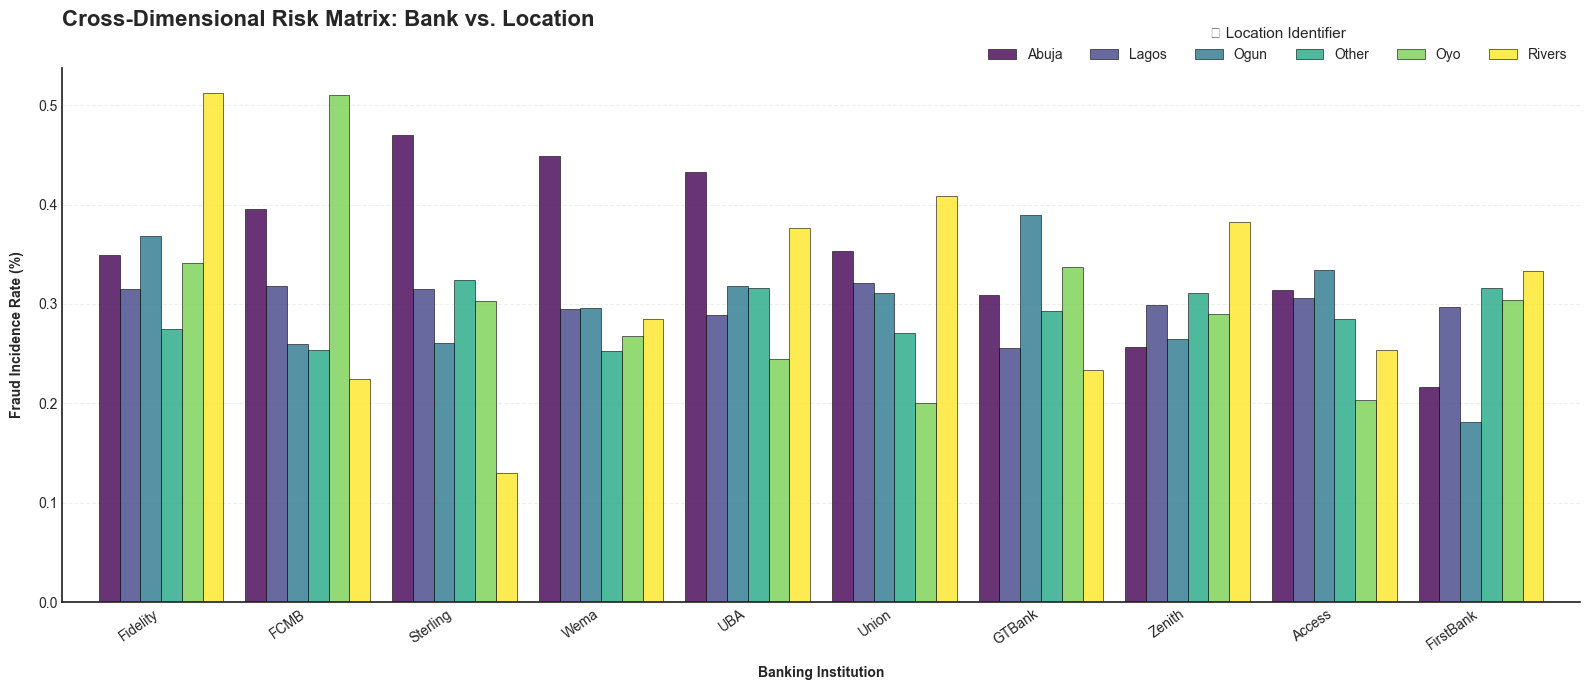


=============================== RISK INTELLIGENCE SUMMARY ================================

[SECTION 1: INSTITUTIONAL VULNERABILITY]
------------------------------------------------------------------------------------------
BANK                 | PEAK RISK LOC      | MAX RATE   | AVG RATE   | SPREAD
------------------------------------------------------------------------------------------
Fidelity             | Rivers             |   0.512% |   0.360% |   0.237%
FCMB                 | Oyo                |   0.510% |   0.327% |   0.286%
Sterling             | Abuja              |   0.470% |   0.300% |   0.340%
Wema                 | Abuja              |   0.449% |   0.307% |   0.196%
UBA                  | Abuja              |   0.433% |   0.330% |   0.188%
Union                | Rivers             |   0.408% |   0.311% |   0.207%
GTBank               | Ogun               |   0.390% |   0.303% |   0.156%
Zenith               | Rivers             |   0.383% |   0.301% |   0.126%
Access 

In [49]:
# --- 1. Data Aggregation (Matrix Transformation) ---
risk_matrix = (
    data_clean.groupby(['bank', 'location'])['is_fraud']
    .mean()
    .mul(100) # Convert to percentage immediately
    .unstack(fill_value=0)
)

# Sorting logic: Rank banks by their peak risk location
risk_matrix = risk_matrix.loc[risk_matrix.max(axis=1).sort_values(ascending=False).index]

# --- 2. Professional Visualization ---
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(16, 7), dpi=100)

# Grouped Bar Plot with a refined color palette
risk_matrix.plot(
    kind='bar', 
    ax=ax, 
    width=0.85, 
    edgecolor='black', 
    linewidth=0.5,
    cmap='viridis', # More professional than tab10 for continuous risk data
    alpha=0.8
)

# Aesthetic Refinement
ax.set_title('Cross-Dimensional Risk Matrix: Bank vs. Location', loc='left', fontsize=16, fontweight='bold', pad=30)
ax.set_ylabel('Fraud Incidence Rate (%)', fontweight='semibold', labelpad=10)
ax.set_xlabel('Banking Institution', fontweight='semibold', labelpad=10)
ax.set_xticklabels(risk_matrix.index, rotation=35, ha='right')

sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Optimized Legend
ax.legend(title='📍 Location Identifier', title_fontsize=11, frameon=False, 
          loc='upper right', bbox_to_anchor=(1, 1.1), ncol=len(risk_matrix.columns))

plt.tight_layout()
plt.show()

# --- 3. High-Level Intelligence Report ---
print(f"\n{' RISK INTELLIGENCE SUMMARY ':=^90}")

# Part A: Bank-Centric Analysis
print(f"\n[SECTION 1: INSTITUTIONAL VULNERABILITY]")
print(f"{'-'*90}")
print(f"{'BANK':<20} | {'PEAK RISK LOC':<18} | {'MAX RATE':<10} | {'AVG RATE':<10} | {'SPREAD'}")
print(f"{'-'*90}")

for bank, rates in risk_matrix.iterrows():
    active_rates = rates[rates > 0]
    if not active_rates.empty:
        max_loc, max_val = active_rates.idxmax(), active_rates.max()
        avg_val, spread = active_rates.mean(), active_rates.max() - active_rates.min()
        print(f"{bank[:20]:<20} | {max_loc:<18} | {max_val:>7.3f}% | {avg_val:>7.3f}% | {spread:>7.3f}%")

# Part B: Location-Centric Analysis
print(f"\n[SECTION 2: GEOSPATIAL THREAT VECTORS]")
print(f"{'-'*90}")
print(f"{'LOCATION':<20} | {'HIGH-RISK BANK':<18} | {'PEAK RATE':<10} | {'REPORTING BANKS'}")
print(f"{'-'*90}")

for loc in risk_matrix.columns:
    loc_data = risk_matrix[loc][risk_matrix[loc] > 0].sort_values(ascending=False)
    if not loc_data.empty:
        print(f"{loc:<20} | {loc_data.idxmax()[:18]:<18} | {loc_data.max():>7.3f}% | {len(loc_data):>14}")

print(f"{'='*90}\n")

- Channel × Bank × Location Analysis 💎

In [50]:
# --- 1. Core Data Aggregation ---
# Pre-calculating the triple-pivot metrics
metrics = (
    data_clean.groupby(['channel', 'bank', 'location'])['is_fraud']
    .agg(fraud_rate_pct=lambda x: x.mean() * 100, tx_count='count')
    .reset_index()
)

# --- 2. Channel-Centric Intelligence Report ---
print(f"\n{' 🛰️  3D RISK MATRIX: CHANNEL x BANK x LOCATION ':=^95}")

for channel in sorted(metrics['channel'].unique()):
    c_df = metrics[metrics['channel'] == channel]
    
    print(f"\n▶ CHANNEL: {channel.upper()}")
    print(f"{'-'*95}")
    
    # Nested Analysis: Top Risk Combinations
    top_5 = c_df.nlargest(5, 'fraud_rate_pct')
    print(f"  [!] CRITICAL PATHS (TOP 5):")
    for _, row in top_5.iterrows():
        print(f"      {row['bank']:<12} × {row['location']:<15} | Rate: {row['fraud_rate_pct']:>7.3f}% | Vol: {int(row['tx_count']):>6,}")

    # Summary Stats for the Channel
    c_avg, c_max, c_min = c_df['fraud_rate_pct'].mean(), c_df['fraud_rate_pct'].max(), c_df['fraud_rate_pct'].min()
    print(f"\n  [μ] AVG: {c_avg:.3f}% | [↑] MAX: {c_max:.3f}% | [↓] MIN: {c_min:.3f}% | [Δ] SPREAD: {c_max-c_min:.3f}%")
    print(f"{'-'*95}")

# --- 3. Geospatial Threat Profiles ---
print(f"\n{' 📍 GEOSPATIAL THREAT VECTORS ':=^95}")
print(f"{'LOCATION':<18} | {'RISK':<8} | {'AVG RATE':<10} | {'MAX THREAT':<12} | {'VOLUME'}")
print(f"{'-'*95}")

loc_agg = metrics.groupby('location').agg(
    Avg_Rate=('fraud_rate_pct', 'mean'),
    Max_Rate=('fraud_rate_pct', 'max'),
    Std_Dev=('fraud_rate_pct', 'std'),
    Total_Tx=('tx_count', 'sum')
).sort_values('Avg_Rate', ascending=False)

for loc, row in loc_agg.iterrows():
    # Dynamic Risk Assessment Logic
    if row['Avg_Rate'] > 0.35:   status, icon = "HIGH", "🔴"
    elif row['Avg_Rate'] > 0.25: status, icon = "MID",  "🟡"
    else:                       status, icon = "LOW",  "🟢"
    
    print(f"{loc:<18} | {icon} {status:<5} | {row['Avg_Rate']:>7.3f}%  | {row['Max_Rate']:>9.3f}%  | {int(row['Total_Tx']):>8,}")

# --- 4. Institutional Resilience Summary ---
print(f"\n{' 🏦 INSTITUTIONAL PERFORMANCE INDEX ':=^95}")
print(f"{'BANKING PARTNER':<18} | {'AVG RATE':<10} | {'BEST CASE':<10} | {'WORST CASE':<12} | {'STABILITY'}")
print(f"{'-'*95}")

bank_agg = metrics.groupby('bank').agg(
    Avg_Rate=('fraud_rate_pct', 'mean'),
    Min_Rate=('fraud_rate_pct', 'min'),
    Max_Rate=('fraud_rate_pct', 'max')
).sort_values('Avg_Rate', ascending=False)

for bank, row in bank_agg.iterrows():
    stability = row['Max_Rate'] - row['Min_Rate']
    print(f"{bank.upper():<18} | {row['Avg_Rate']:>7.3f}%  | {row['Min_Rate']:>7.3f}%  | {row['Max_Rate']:>9.3f}%   | Δ {stability:.3f}%")

print(f"{'='*95}\n")


======================== 🛰️  3D RISK MATRIX: CHANNEL x BANK x LOCATION ========================

▶ CHANNEL: ATM
-----------------------------------------------------------------------------------------------
  [!] CRITICAL PATHS (TOP 5):
      GTBank       × Rivers          | Rate:   1.389% | Vol:     72
      Zenith       × Ogun            | Rate:   1.389% | Vol:     72
      UBA          × Ogun            | Rate:   1.099% | Vol:     91
      FirstBank    × Abuja           | Rate:   0.971% | Vol:    103
      Union        × Abuja           | Rate:   0.962% | Vol:    104

  [μ] AVG: 0.140% | [↑] MAX: 1.389% | [↓] MIN: 0.000% | [Δ] SPREAD: 1.389%
-----------------------------------------------------------------------------------------------

▶ CHANNEL: ECOM
-----------------------------------------------------------------------------------------------
  [!] CRITICAL PATHS (TOP 5):
      Fidelity     × Abuja           | Rate:   1.176% | Vol:    255
      Sterling     × Abuja           |

- Channel × Amount Fraud Analysis 💰

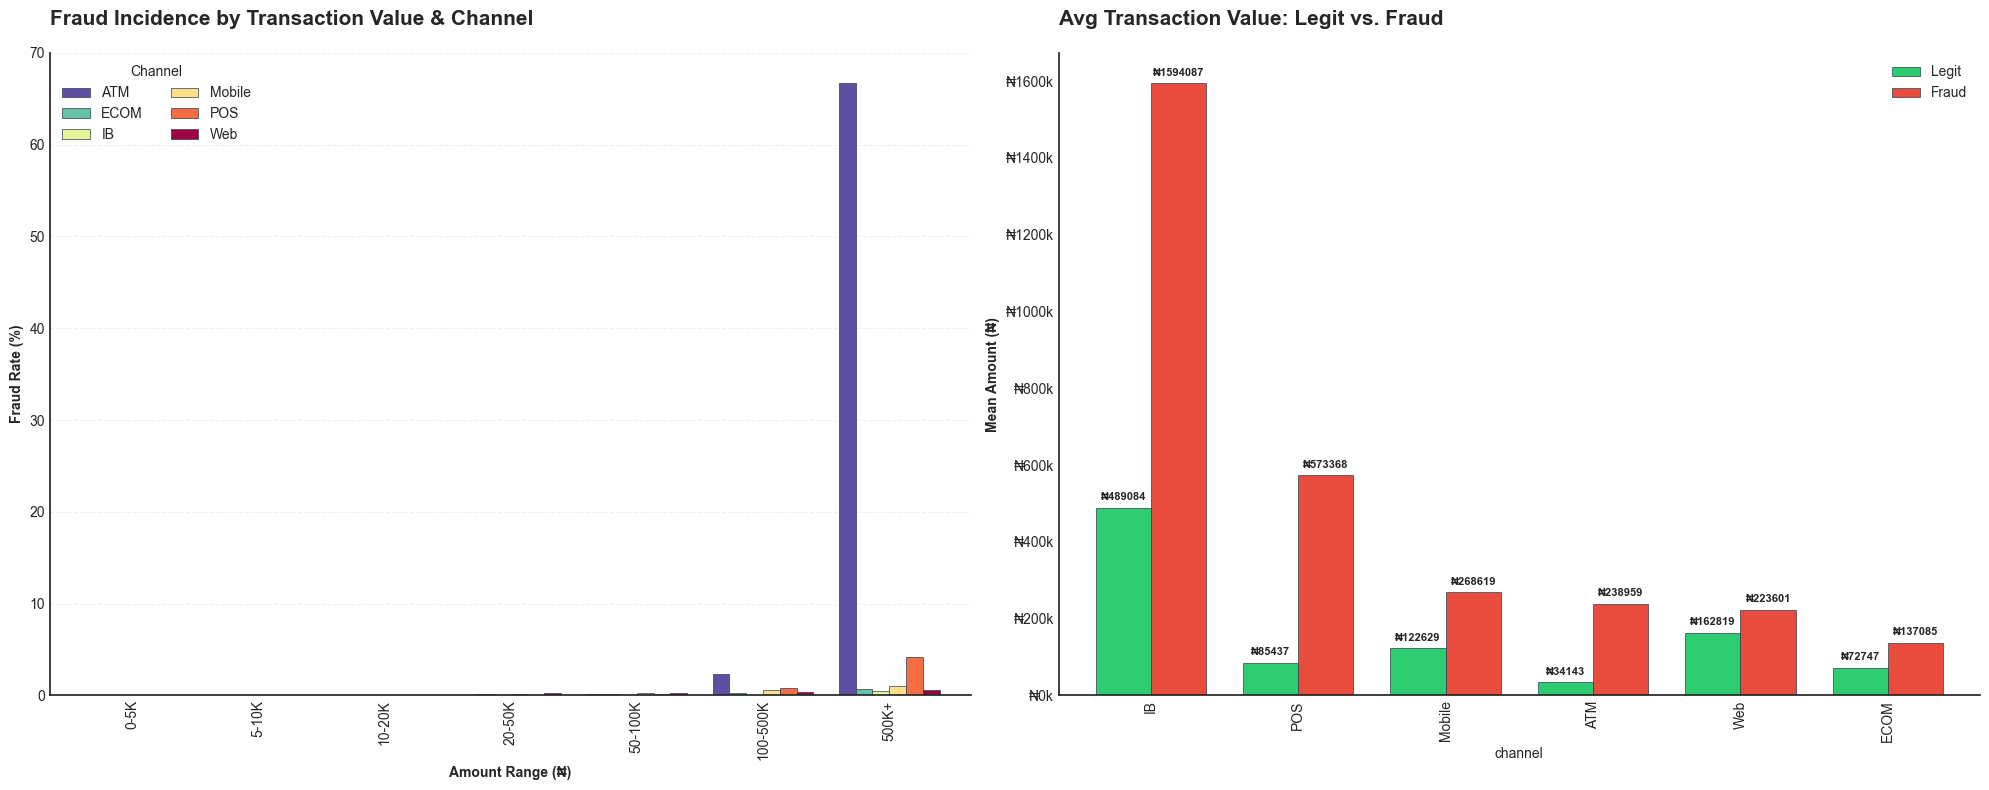


=============================== FINANCIAL RISK MAGNITUDE REPORT ===============================
CHANNEL         | LEGIT AVG       | FRAUD AVG       | DELTA %      | MAX RISK BIN
-----------------------------------------------------------------------------------------------
IB              | ₦489,084        | ₦1,594,087      |     +225.9% | 500K+ (0.46%)
POS             | ₦85,437         | ₦573,368        |     +571.1% | 500K+ (4.24%)
MOBILE          | ₦122,629        | ₦268,619        |     +119.0% | 500K+ (1.01%)
ATM             | ₦34,143         | ₦238,959        |     +599.9% | 500K+ (66.67%)
WEB             | ₦162,819        | ₦223,601        |      +37.3% | 500K+ (0.64%)
ECOM            | ₦72,747         | ₦137,085        |      +88.4% | 500K+ (0.75%)
-----------------------------------------------------------------------------------------------
⚠️  CRITICAL ALERT: Top 3 High-Risk Nodes (Min 50 Tx)
   - POS transactions in 500K+ range show a 4.242% fraud rate.
   - ATM transactio

In [51]:
# --- 1. Data Engineering & Binning ---
bins = [0, 5000, 10000, 20000, 50000, 100000, 500000, float('inf')]
labels = ['0-5K', '5-10K', '10-20K', '20-50K', '50-100K', '100-500K', '500K+']

# Vectorized binning and grouping
data_clean['amount_range'] = pd.cut(data_clean['amount'], bins=bins, labels=labels)

channel_metrics = (
    data_clean.groupby(['channel', 'amount_range'], observed=True)['is_fraud']
    .agg(fraud_rate=lambda x: x.mean() * 100, tx_vol='count')
    .reset_index()
)

# --- 2. Professional Dashboard Visualization ---
plt.style.use('seaborn-v0_8-white')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# PLOT 1: Risk Heat per Amount Range (Grouped)
pivot_risk = channel_metrics.pivot(index='amount_range', columns='channel', values='fraud_rate')
pivot_risk.plot(kind='bar', ax=ax1, width=0.8, edgecolor='#2c3e50', linewidth=0.5, cmap='Spectral_r')

ax1.set_title('Fraud Incidence by Transaction Value & Channel', loc='left', fontsize=15, fontweight='bold', pad=20)
ax1.set_ylabel('Fraud Rate (%)', fontweight='semibold')
ax1.set_xlabel('Amount Range (₦)', fontweight='semibold')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.legend(title='Channel', frameon=False, loc='upper left', ncol=2)
sns.despine(ax=ax1)

# PLOT 2: Magnitude Comparison (Avg Amount)
avg_amounts = (
    data_clean.groupby(['channel', 'is_fraud'])['amount']
    .mean()
    .unstack()
    .rename(columns={0: 'Legit', 1: 'Fraud'})
    .sort_values('Fraud', ascending=False)
)

avg_amounts.plot(kind='bar', ax=ax2, width=0.75, color=['#2ecc71', '#e74c3c'], edgecolor='#2c3e50', linewidth=0.5)

ax2.set_title('Avg Transaction Value: Legit vs. Fraud', loc='left', fontsize=15, fontweight='bold', pad=20)
ax2.set_ylabel('Mean Amount (₦)', fontweight='semibold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₦{int(x/1000)}k'))
ax2.legend(frameon=False)
sns.despine(ax=ax2)

# Annotate bars in Plot 2
for c in ax2.containers:
    ax2.bar_label(c, fmt='₦%.0f', padding=4, fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# --- 3. High-Value Intelligence Report ---
print(f"\n{' FINANCIAL RISK MAGNITUDE REPORT ':=^95}")
print(f"{'CHANNEL':<15} | {'LEGIT AVG':<15} | {'FRAUD AVG':<15} | {'DELTA %':<12} | {'MAX RISK BIN'}")
print(f"{'-'*95}")

for channel in avg_amounts.index:
    legit, fraud = avg_amounts.loc[channel, 'Legit'], avg_amounts.loc[channel, 'Fraud']
    pct_diff = ((fraud / legit) - 1) * 100
    
    # Get highest risk bin for this channel
    top_bin = channel_metrics[channel_metrics['channel'] == channel].nlargest(1, 'fraud_rate')
    bin_name = top_bin['amount_range'].values[0]
    bin_rate = top_bin['fraud_rate'].values[0]
    
    print(f"{channel.upper():<15} | ₦{legit:<14,.0f} | ₦{fraud:<14,.0f} | {pct_diff:>+10.1f}% | {bin_name} ({bin_rate:.2f}%)")

print(f"{'-'*95}")
print(f"⚠️  CRITICAL ALERT: Top 3 High-Risk Nodes (Min 50 Tx)")
top_nodes = channel_metrics[channel_metrics['tx_vol'] >= 50].nlargest(3, 'fraud_rate')
for _, row in top_nodes.iterrows():
    print(f"   - {row['channel'].upper()} transactions in {row['amount_range']} range show a {row['fraud_rate']:.3f}% fraud rate.")
print(f"{'='*95}\n")

In [58]:
# Remove temporary columns created during EDA
temp_cols = ['time_period', 'amount_range']
cols_to_drop = [col for col in temp_cols if col in data_clean.columns]

if cols_to_drop:
    data_clean = data_clean.drop(columns=cols_to_drop)
    print(f"✅ Dropped temporary EDA columns: {cols_to_drop}")

# Final data integrity check
print(f"\n📊 FINAL DATA SUMMARY:")
print(f"   • Total Records: {len(data_clean):,}")
print(f"   • Total Features: {data_clean.shape[1]}")
print(f"   • Fraud Cases: {data_clean['is_fraud'].sum():,} ({data_clean['is_fraud'].mean()*100:.3f}%)")
print(f"   • Missing Values: {data_clean.isnull().sum().sum()}")
print(f"\n📋 Features for ML:")
print(f"   {list(data_clean.columns)}")

# Save to pickle (preserves dtypes) and CSV (human-readable)
data_clean.to_pickle('data_clean.pkl')
data_clean.to_csv('data_clean.csv', index=False)

print(f"\n✅ SAVED:")
print(f"   • data_clean.pkl  (for Python/ML - {data_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB)")
print(f"   • data_clean.csv  (for backup/review)")
print(f"\n🚀 Ready for Logistic Regression, SHAP, and K-Means!")

✅ Dropped temporary EDA columns: ['time_period', 'amount_range']

📊 FINAL DATA SUMMARY:
   • Total Records: 1,000,000
   • Total Features: 32
   • Fraud Cases: 3,000 (0.300%)
   • Missing Values: 0

📋 Features for ML:
   ['transaction_id', 'customer_id', 'timestamp', 'amount', 'channel', 'merchant_category', 'bank', 'location', 'age_group', 'hour', 'day_of_week', 'month', 'is_weekend', 'is_peak_hour', 'tx_count_24h', 'amount_sum_24h', 'amount_mean_7d', 'amount_std_7d', 'tx_count_total', 'amount_mean_total', 'amount_std_total', 'channel_diversity', 'location_diversity', 'amount_vs_mean_ratio', 'online_channel_ratio', 'is_fraud', 'amount_log', 'velocity_score', 'merchant_risk_score', 'composite_risk', 'age_numeric', 'velocity_bin']

✅ SAVED:
   • data_clean.pkl  (for Python/ML - 670.55 MB)
   • data_clean.csv  (for backup/review)

🚀 Ready for Logistic Regression, SHAP, and K-Means!


---
## 💾 Save Cleaned Data for ML Phase